In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import math

In [0]:
def best_path(N,M,D):
  p=N-1
  q=N-1
  new_match = np.zeros((N))
  new_match_right = np.zeros((N))
  k=N-1
  while p!=0 and q!=0:
    if(M[p][q]==1):
      #new_match[p] = D[p][q]
      p-=1
      q-=1
      new_match[p] = abs(p-q)
    if(M[p][q]==2):
      p-=1
      new_match[p] = 0
    if(M[p][q]==3):
      q-=1
      
  return new_match


def matching(N,D,grey_left,grey_right,row):
  M = np.zeros((N,N))
  for i in range(1,N):
    for j in range(1,N):
      min1 = D[i-1][j-1]+math.pow((grey_left[row][i]-grey_right[row][j]),2)/4
      min2 = D[i-1][j]+4
      min3 = D[i][j-1]+4
      cmin =min(min1,min2,min3)
      D[i][j] = cmin
      if(cmin == min1):
        M[i][j] = 1
      if(cmin == min2):
        M[i][j] = 2
      if(cmin == min3):
        M[i][j] = 3
  path = best_path(N,M,D)
   
  return path,D

In [0]:
def disparity_dp(img_left,img_right):
  #color 2 grey
  flag=0
  grey_right = cv2.cvtColor(cv2.imread(img_right), cv2.COLOR_BGR2GRAY)
  grey_left = cv2.cvtColor(cv2.imread(img_left), cv2.COLOR_BGR2GRAY)
  cv2_imshow(grey_right)
  cv2_imshow(grey_left)
  row = np.shape(grey_left)[0]
  col = np.shape(grey_left)[1]
  disparity_image = np.zeros((row,col)) 
  for i in range(0,row):
    D = np.zeros((col,col))
    D[0][0] = math.pow((grey_left[0][0]-grey_right[0][0]),2)/4
    for k in range(1,col):
      D[k][0] = k*4
      D[0][k] = k*4
    #D = recursive_step(i,D,399,399,grey_right,grey_left)
    new_match ,D= matching(col,D,grey_left,grey_right,i)
    #cv2_imshow(D)
    #d_new = backtracking(D,399)
    disparity_image[i:,] = new_match
    #print(flag)
    #flag+=1
  #new = cv2.normalize(disparity_image , dist = x)  
  cv2_imshow(disparity_image)
    #break

  return disparity_image

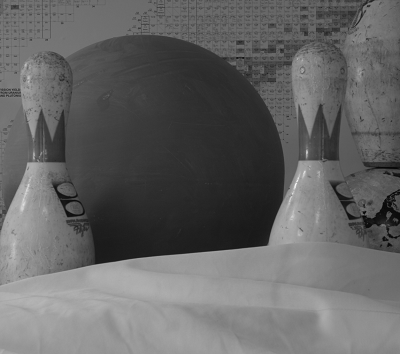

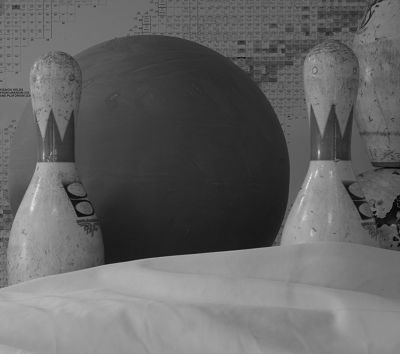

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in ubyte_scalars


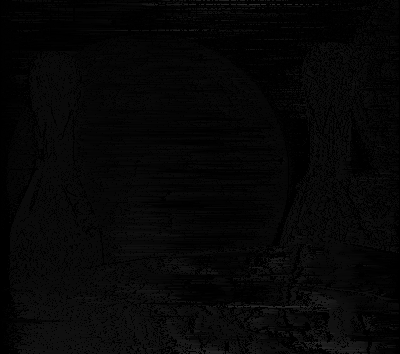

In [0]:
result = disparity_dp('/content/sample_left.png','/content/sample_right.png')

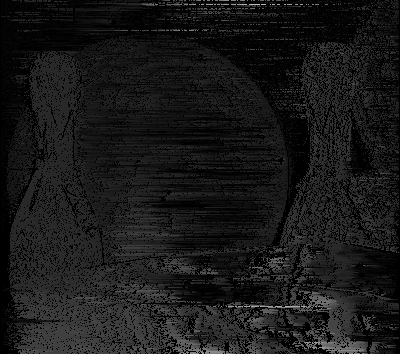

In [0]:
final_1 = result*4
cv2_imshow(final_1)
#print(np.max(result))

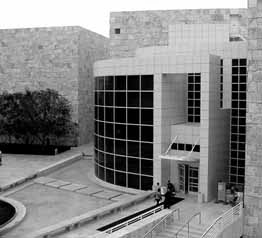

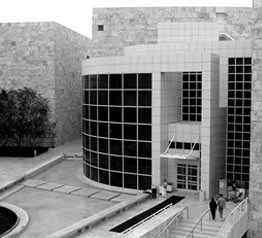

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in ubyte_scalars


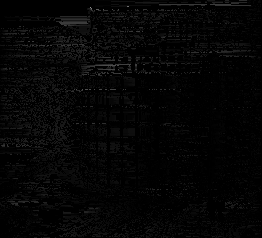

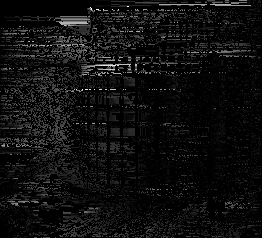

In [0]:
result_2= disparity_dp('/content/stereo-getty-left.jpg','/content/stereo-getty-right.jpg')
final_3 = result_2*3
cv2_imshow(final_3)

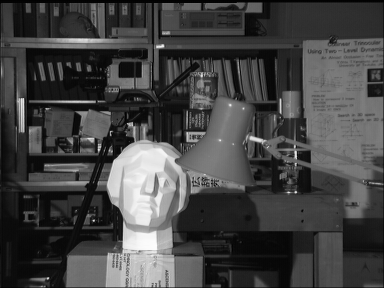

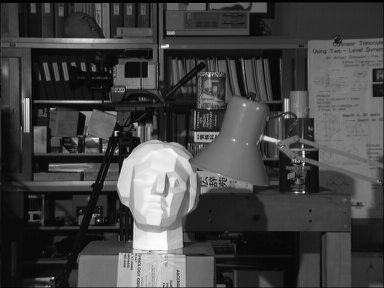

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in ubyte_scalars


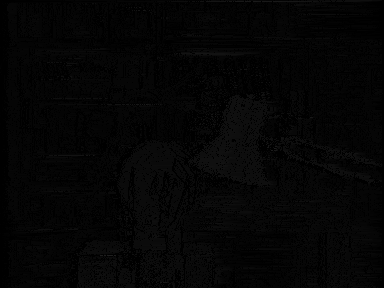

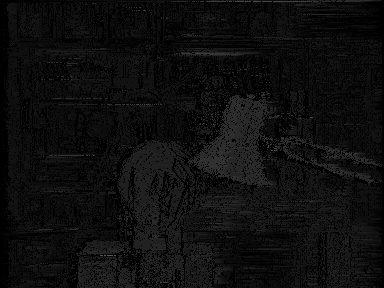

In [0]:
result_3= disparity_dp('/content/scene_l.pgm','/content/scene_r.pgm')
final_4 = result_3*3
cv2_imshow(final_4)